## Detective: Fraud Detection Analysis

The goal of the `Detective` project is to leverage artificial intelligence (AI), to detect fraudualent credit card transactions.

We'll explore various classification algorithms, such as Logistic Regression and Random Forest Classifier, along with ensemble methods including bagging, boosting, and stacking, and assess their performance for this specific task.

These models can serve various purposes and find applications in different contexts, such as:

- **Credit Card Fraud Detection**: Identifying unauthorized transactions on credit or debit cards in real-time to prevent financial loss for both cardholders and financial institutions.
  
- **Banking Fraud Prevention**: Identifying unusual patterns in banking transactions, such as money laundering or account hacking attempts, to safeguard customers' funds and financial integrity.
  
- **Online Payment Fraud Prevention**: Detecting fraudulent activities in online payment processes, such as phishing scams or identity theft during online transactions, to enhance security for consumers and businesses.

## Dataset

### Loading the dataset

To train our model, we will utilize a labeled "simulated credit card transactions" dataset from Kaggle (source: https://www.kaggle.com/datasets/kartik2112/fraud-detection).

In [1]:
# download data from kaggle
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 96% 193M/202M [00:02<00:00, 120MB/s]
100% 202M/202M [00:02<00:00, 94.3MB/s]


In [2]:
# unzip the dataset
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [3]:
# import packages for data exploration

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

### Exploring the dataset

The dataset consists of Train and Test records in .csv format.

First, we'll load and explore the training data.


In [4]:
# Read the data into a Pandas DataFrame
df = pd.read_csv("fraudTrain.csv", index_col=0)
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


Training data includes ~1.3 M records.

Here is a brief description for each column:

- **trans_date_trans_time**: Date and time of the transaction.
- **cc_num**: Credit card number used for the transaction.
- **merchant**: Name of the merchant where the transaction occurred.
- **category**: Category of the transaction (e.g., groceries, entertainment).
- **amt**: Amount of money involved in the transaction.
- **first**: First name of the cardholder.
- **last**: Last name of the cardholder.
- **gender**: Gender of the cardholder.
- **street**: Street address of the cardholder.
- **city**: City of the cardholder's address.
- **state**: State of the cardholder's address.
- **zip**: ZIP code of the cardholder's address.
- **lat**: Latitude of the merchant's location.
- **long**: Longitude of the merchant's location.
- **city_pop**: Population of the city where the transaction occurred.
- **job**: Occupation of the cardholder.
- **dob**: Date of birth of the cardholder.
- **trans_num**: Unique transaction identifier.
- **unix_time**: Unix timestamp of the transaction.
- **merch_lat**: Latitude of the merchant's location.
- **merch_long**: Longitude of the merchant's location.
- **is_fraud**: Binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

In [5]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

It appears that there are no missing values.

Next, we'll examine the distribution of certain features.

Table below indicates the proportion of fraudulent transactions (is_fraud = 1) compared to legitimate transactions (is_fraud = 0). Specifically, it shows that approximately 99.4% of the transactions are classified as legitimate, while only about 0.6% are classified as fraudulent.

In [6]:
df['is_fraud'].value_counts(normalize=True).to_frame().style.format('{:.1%}')

,proportion
is_fraud,
0,99.4%
1,0.6%


Similarly, subsequent tables display the proportions of merchants, transaction categories, buyers' genders, and buyers' occupations within the dataset.

In [7]:
df['merchant'].value_counts(normalize=True).to_frame().head(10).style.format('{:.1%}')

,proportion
merchant,
fraud_Kilback LLC,0.3%
fraud_Cormier LLC,0.3%
fraud_Schumm PLC,0.3%
fraud_Kuhn LLC,0.3%
fraud_Boyer PLC,0.3%
fraud_Dickinson Ltd,0.3%
fraud_Cummerata-Jones,0.2%
fraud_Kutch LLC,0.2%
"fraud_Olson, Becker and Koch",0.2%


In [8]:
df['category'].value_counts(normalize=True).to_frame().head(10).style.format('{:.1%}')

,proportion
category,
gas_transport,10.2%
grocery_pos,9.5%
home,9.5%
shopping_pos,9.0%
kids_pets,8.7%
shopping_net,7.5%
entertainment,7.3%
food_dining,7.1%
personal_care,7.0%


In [9]:
df['gender'].value_counts(normalize=True).to_frame().style.format('{:.1%}')

,proportion
gender,
F,54.7%
M,45.3%


In [10]:
df['job'].value_counts(normalize=True).to_frame().head(10).style.format('{:.1%}')

,proportion
job,
Film/video editor,0.8%
Exhibition designer,0.7%
Naval architect,0.7%
"Surveyor, land/geomatics",0.7%
Materials engineer,0.6%
"Designer, ceramics/pottery",0.6%
Systems developer,0.6%
IT trainer,0.6%
Financial adviser,0.6%


### Preprocessing

This preprocessing step involves processing the dataset to prepare it for further analysis. The function `process_dataset` performs several transformations on the input DataFrame to create a processed DataFrame with selected columns:


- **Copying DataFrame**: The function creates a copy of the input DataFrame to avoid modifying the original data.
- **Age Calculation**: It calculates the age of individuals involved in transactions by subtracting their date of birth from the transaction date and bins the ages into groups of 10 years.
- **Hour Extraction**: It extracts the hour component from the transaction timestamp to identify the hour of the transaction.
- **Distance Calculation**: It computes the distance between the transaction location and the merchant location using latitude and longitude coordinates.
- **Log Transformation**: It applies a natural logarithm transformation to the transaction amount and the city population to normalize their distributions. (we apply log, as the original distribution for these parameters are highly skewed)
- **Column Selection**: It selects a subset of columns including 'category', 'log_amt', 'gender', 'log_city_pop', 'age_bin', 'hour_of_transaction', 'distance', and 'is_fraud' for further analysis.



In [11]:
from pandas.core.frame import DataFrame

def process_dataset(df: DataFrame) -> DataFrame:
    """
    Process the input DataFrame by performing several data transformations.

    Parameters:
    - df (DataFrame): Input DataFrame containing transaction data.

    Returns:
    - DataFrame: Processed DataFrame with selected columns for further analysis.
    """
    df_processed = df.copy()

    # Calculate age and bin it into groups of 10 years
    df_processed['age'] = (pd.to_datetime(df_processed['trans_date_trans_time']).dt.year -
                           pd.to_datetime(df_processed['dob']).dt.year)
    df_processed['age_bin'] = df_processed['age'] // 10

    # Extract hour of transaction
    df_processed['hour_of_transaction'] = pd.to_datetime(df_processed['trans_date_trans_time']).dt.hour

    # Compute distance between transaction and merchant locations
    df_processed['distance'] = np.sqrt(((df_processed['lat'] - df_processed['merch_lat']) ** 2) +
                                       ((df_processed['long'] - df_processed['merch_long']) ** 2))

    # Apply natural logarithm transformation to amount and city population
    df_processed['log_amt'] = np.log1p(df_processed['amt'])
    df_processed['log_city_pop'] = np.log1p(df_processed['city_pop'])

    # Select relevant columns
    selected_columns = ['category', 'log_amt', 'gender', 'log_city_pop', 'age_bin',
                        'hour_of_transaction', 'distance', 'is_fraud']

    return df_processed[selected_columns]


df_processed = process_dataset(df)
df_processed.head(3)

,category,log_amt,gender,log_city_pop,age_bin,hour_of_transaction,distance,is_fraud
0,misc_net,1.786747,F,8.159375,3,0,0.872830,0
1,grocery_pos,4.684259,F,5.010635,4,0,0.272310,0
2,entertainment,5.398660,M,8.332068,5,0,0.975845,0


Let's examine the distribution of the features we've just created.

<Axes: xlabel='age_bin'>

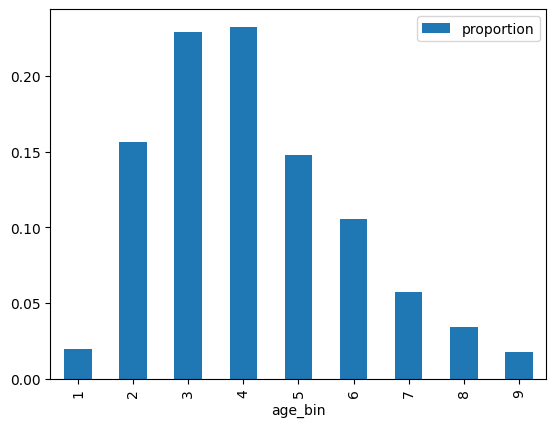

In [12]:
df_processed['age_bin'].value_counts(normalize=True).sort_index().to_frame().plot(kind='bar')

<Axes: xlabel='hour_of_transaction'>

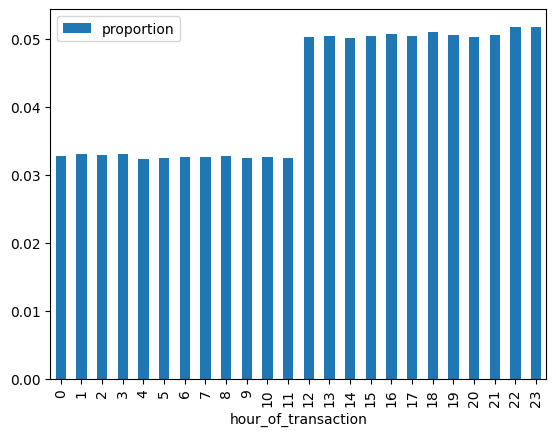

In [13]:
df_processed['hour_of_transaction'].value_counts(normalize=True).sort_index().to_frame().plot(kind='bar')

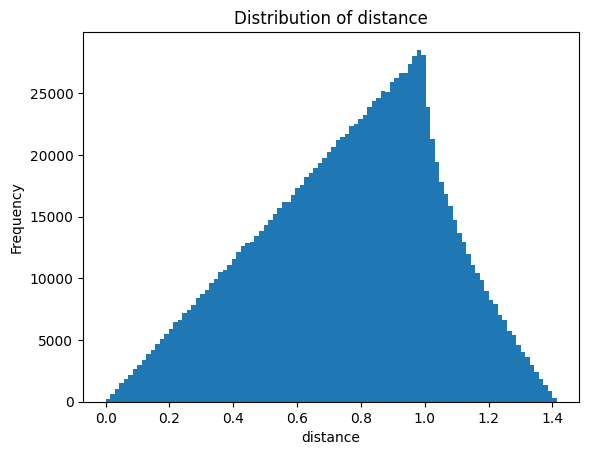

In [14]:
plt.hist(df_processed['distance'], bins=100)
plt.xlabel('distance')
plt.ylabel('Frequency')
plt.title('Distribution of distance')
plt.show()

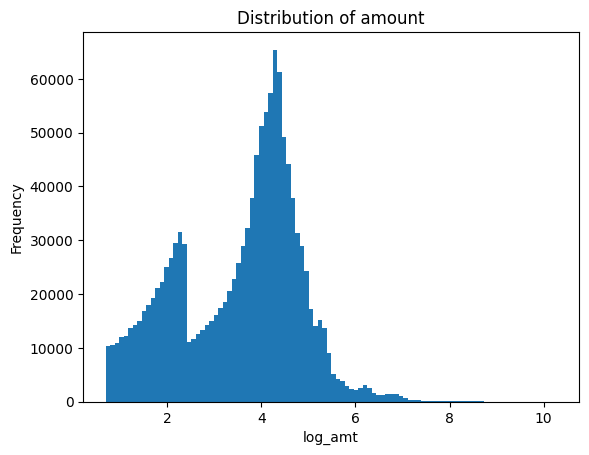

In [15]:
plt.hist(df_processed['log_amt'], bins=100)
plt.xlabel('log_amt')
plt.ylabel('Frequency')
plt.title('Distribution of amount')
plt.show()


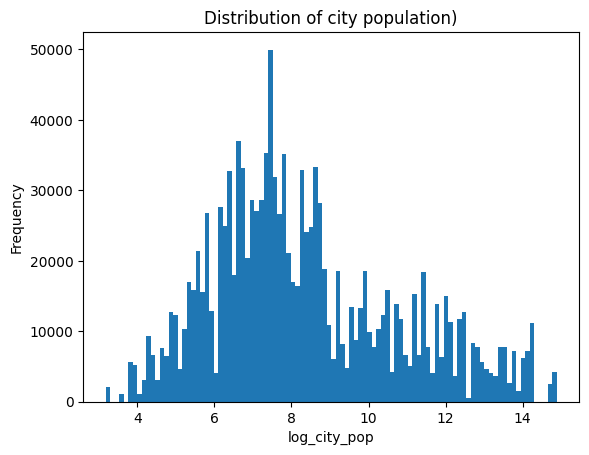

In [16]:
plt.hist(df_processed['log_city_pop'], bins=100)
plt.xlabel('log_city_pop')
plt.ylabel('Frequency')
plt.title('Distribution of city population)')
plt.show()

Our objective is to predict the 'is_fraud' column. Therefore, we will store our features in X_train and our target in y_train.

In [17]:
# Create train and test data
feature_cols = df_processed.columns[:-1]
target_col = df_processed.columns[-1]
X_train = df_processed.drop(target_col, axis=1)
y_train = df_processed[target_col]

In this code snippet, numeric and categorical columns are extracted from the training feature dataset. This is essential for constructing a processing pipeline.

In [18]:
# select numeric cols and categorical columns
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numeric feature columns: {num_cols}')
print(f'categorical feature columns: {cat_cols}')
print(f'target column: {target_col}')

numeric feature columns: ['log_amt', 'log_city_pop', 'age_bin', 'hour_of_transaction', 'distance']
categorical feature columns: ['category', 'gender']
target column: is_fraud


Examining the correlation matrix allows us to grasp the associations between various variables in the dataset. The table below indicates a correlation between fraudulent activities and the (log) amount of transactions.

In [19]:
corr_matrix = df_processed.corr(numeric_only=True)
corr_matrix[target_col].sort_values(ascending=False)

is_fraud               1.000000
log_amt                0.120439
hour_of_transaction    0.013799
age_bin                0.012161
log_city_pop           0.001582
distance               0.000434
Name: is_fraud, dtype: float64

### Preprocessing pipeline
In this code snippet, a column transformer and a pipeline are defined for preprocessing the data.

The column transformer applies different transformations to numerical and categorical columns separately, while the pipeline combines these transformations into a single process.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the column transformer
ct = ColumnTransformer([
    ('numerical', StandardScaler(), num_cols),
    ('categorical', OneHotEncoder(), cat_cols)
])

# Create the pipeline
pipeline = Pipeline([
    ('prepare_data', ct),
])

# Fit the pipeline to the data
pipeline.fit(X_train)

# Transform the data
X_train_transformed = pipeline.transform(X_train)

In order to evaluate our models, we will load and preprocess the test data using the `process_dataset` function and the pipeline that we have just created.

In [21]:
# Read the test data
df_test = pd.read_csv("fraudTest.csv", index_col=0)

# Process the test data
df_test_processed = process_dataset(df_test)

# Transform the test data
X_test = df_test_processed[feature_cols]
y_test = df_test_processed[target_col]

X_test_transformed = pipeline.transform(X_test)

## Training the model

### Dummy Classifier

The Dummy Classifier is a simple baseline model used for classification tasks. It serves as a reference point for comparing the performance of more sophisticated models. The Dummy Classifier predicts classes using simple rules, such as predicting the most frequent class in the training data.

We'll store the performance scores for each model in performance_metrics for comparison.

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the dummy classifier to the data
dummy_clf.fit(X_train, y_train)

# Predict using the dummy classifier
dummy_predictions = dummy_clf.predict(X_train)

# Calculate the performance metrics
accuracy = accuracy_score(y_train, dummy_predictions)
precision = precision_score(y_train, dummy_predictions)
recall = recall_score(y_train, dummy_predictions)
f1 = f1_score(y_train, dummy_predictions)

# Print the performance metrics
print(f"Dummy Accuracy: {accuracy:.2f}")
print(f"Dummy Precision: {precision:.2f}")
print(f"Dummy Recall: {recall:.2f}")
print(f"Dummy F1 Score: {f1:.2f}")

performance_metrics = dict()
performance_metrics['Dummy'] = {'accuracy':accuracy, 'precision': precision, 'recall':recall, 'f1':f1}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dummy Accuracy: 0.99
Dummy Precision: 0.00
Dummy Recall: 0.00
Dummy F1 Score: 0.00


As you can see, even a Dummy classifier may achieve high accuracy on imbalanced data due to the skewed class distribution.

So, for imbalanced classification tasks like fraud detection, it is essential to use evaluation metrics that consider other performance metrics, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC). These metrics provide a more comprehensive assessment of the classifier's performance, especially in the context of imbalanced datasets.

### Logistic Regression
Next, we'll train a simple logistic regression model to assess its performance.

In [23]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression classifier
lr = LogisticRegression(random_state=8, class_weight='balanced')

# Fit the Logistic Regression classifier to the data
lr.fit(X_train_transformed, y_train)

# Make predictions using the Logistic Regression classifier
y_pred_lr = lr.predict(X_test_transformed)

# Calculate the performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the performance metrics
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 Score: {f1_lr:.2f}")

performance_metrics['LogisticRegression'] = {'accuracy':accuracy_lr, 'precision': precision_lr, 'recall':recall_lr, 'f1':f1_lr}


Logistic Regression Accuracy: 0.75
Logistic Regression Precision: 0.01
Logistic Regression Recall: 0.73
Logistic Regression F1 Score: 0.02


Logistic regression shows a considerable improvement in recall (compared to the Dummy classifier), yet it still has a very low precision and F1 score. This indicates its capability to detect fraudulent activities, but it also tends to produce a considerable number of false positives.

### Random Forest

Next, we'll experiment with a random forest model and employ grid search to identify the optimal configurations. To enhance the efficiency of grid search, we'll work with a subset of our dataset. However, since our data is imbalanced, we must ensure that the ratio of fraudulent transactions is preserved in the subset. To achieve this, we'll utilize the `stratified_sample_idx` function.

The `stratified_sample_idx` function takes in an array of class labels `y`, and optionally a fraction `frac` specifying the proportion of samples to be taken from each class, and a `random_state` parameter for seeding randomness. It calculates the count of each class, determines the number of samples needed from each class based on the fraction specified, and then randomly samples indices from each class while maintaining the proportions specified. Finally, it shuffles the sampled indices and returns them. This function is useful for creating a stratified sample, ensuring that the distribution of classes in the sampled data closely matches that of the original data.

In [24]:
from collections import Counter
import random

def stratified_sample_idx(y, frac=.1, random_state=8):
  random.seed(random_state)

  class_count = dict(Counter(y))
  print(f'class_count: {class_count}')

  sample_count = {k: int(v*frac) for k,v in class_count.items()}
  print(f'sample_count: {sample_count}')

  sample_idx = []
  for class_, sample_from_class in sample_count.items():
    idx = list(np.where(y == class_)[0])  # indices fro the class_
    sample_idx.extend(random.sample(idx, sample_from_class))  # sampled indices fro the class_

  random.shuffle(sample_idx)
  return sample_idx

sample_idx = stratified_sample_idx(y_train)

class_count: {0: 1289169, 1: 7506}
sample_count: {0: 128916, 1: 750}


### Performance metrics
In fraud detection, both recall and precision are crucial evaluation metrics:

- **Recall (Sensitivity)**: Recall measures the proportion of actual positive cases (fraudulent transactions) that are correctly identified by the classifier. A high recall indicates that the model can effectively detect most of the fraudulent transactions, minimizing false negatives (missed fraud cases). In fraud detection, missing fraudulent activities can be costly, so maximizing recall is essential to capture as many fraud cases as possible.

- **Precision**: Precision measures the proportion of predicted positive cases (identified fraud cases) that are truly positive (actual fraud cases). A high precision indicates that the model correctly identifies a large portion of the predicted fraud cases, minimizing false positives (incorrectly labeled legitimate transactions as fraudulent). Precision is important because false positives can lead to unnecessary investigations or inconvenience for legitimate customers.

- **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a balanced assessment of a classifier's performance. It combines both precision and recall into a single metric, making it useful for evaluating models on imbalanced datasets, such as fraud detection. By considering both false positives and false negatives, the F1 score offers a more comprehensive view of the model's effectiveness.

#### F_beta score
In this project, our primary focus is on recall (minimizing false negatives), even if it entails a trade-off with precision (increase in false positives). The main reasons are:
- The consequences of missing fraudulent transactions (false negatives) can be severe, encompassing financial losses and harm to reputation.
- Maximizing recall ensures the identification of as many fraudulent transactions as possible, thereby mitigating the risk associated with undetected fraud.
- False positives, unless they become excessive, are manageable, as customers can verify transactions through methods like text messages or similar means.


F-beta score is a generalized version of the F1 score that allows us to assign different weights to precision and recall. Beta is a parameter that determines the weight assigned to recall relative to precision.
- When beta = 1, it is equivalent to the F1 score.
- When beta > 1, more weight is given to recall, emphasizing its importance.
- When beta < 1, more weight is given to precision.

By adjusting the value of beta, we can prioritize either precision or recall based on the specific requirements of the application. In fraud detection, where detecting all fraudulent transactions is critical, a higher weight is typically assigned to recall (e.g., beta = 2), emphasizing the importance of minimizing false negatives.


Here, we'll define a custom scoring function (f_beta with beta=2) and utilize `sklearn.metrics.make_scorer` to incorporate it into the grid search cross-validation process.

In [25]:
from sklearn.metrics import make_scorer

def f_beta_score(y_true, y_pred):
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  beta = 2.
  f_beta = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
  return f_beta

scoring = make_scorer(f_beta_score)

#### Grid Search
We'll employ `sklearn.model_selection.GridSearchCV` to determine the optimal parameters for the RandomForestClassifier model, aiming to maximize the f_beta score.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10],
    'n_estimators': [10, 20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=8, class_weight='balanced'),
                           param_grid, cv=3, scoring=scoring, n_jobs=-1, verbose=3)

# GridSearch on a smaller subset of dataset
X_subset = X_train_transformed[sample_idx,:]
y_subset = y_train.iloc[sample_idx]

# Fit the GridSearchCV object to the data
grid_search.fit(X_subset, y_subset)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=8),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [10, 20]},
             scoring=make_scorer(f_beta_score), verbose=3)

In [27]:
# Get the best rfc model
best_rfc = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_rfc.predict(X_subset)

# Calculate the performance metrics
best_accuracy = accuracy_score(y_subset, y_pred)
best_precision = precision_score(y_subset, y_pred)
best_recall = recall_score(y_subset, y_pred)
best_f1 = f1_score(y_subset, y_pred)

# Print the performance metrics
print(f'Best params for RF model: {best_params}')
print(f"Accuracy: {best_accuracy:.2f}")
print(f"Precision: {best_precision:.2f}")
print(f"Recall: {best_recall:.2f}")
print(f"F1 Score: {best_f1:.2f}")

Best params for RF model: {'max_depth': 10, 'n_estimators': 20}
Accuracy: 0.99
Precision: 0.44
Recall: 0.96
F1 Score: 0.60


The Random Forest model notably outperforms Logistic Regression. Additionally, observe the significantly higher recall compared to precision, as intended.

We had utilized a subset of our data for GridSearchCV. Now, let's train our model using the best parameters on the entire training set.

In [28]:
# Train the best rfc model on the entire dataset
best_rfc.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=20,
                       random_state=8)

## Model evaluation
Here, we'll examine more descriptive criteria such as precision-recall and ROC curves to assess our Random Forest model.

### Precision-Recall (PR) Curve:

- Precision: Precision is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). It measures the accuracy of positive predictions made by the classifier.
- Recall (Sensitivity): Recall is the ratio of true positive predictions to the total number of actual positives (true positives and false negatives). It measures the ability of the classifier to correctly identify positive instances.
- PR Curve: The PR curve is a plot of precision against recall at various classification thresholds. Each point on the curve represents a different threshold setting. A higher area under the PR curve indicates better model performance, especially in imbalanced datasets where the positive class is rare.

In [29]:
# Get the probabilities and predictions for our training dataset
y_prob = best_rfc.predict_proba(X_train_transformed)[:, 1]
y_pred = best_rfc.predict(X_train_transformed)

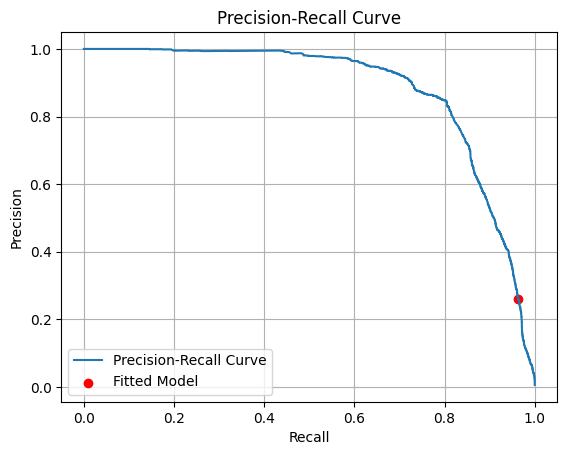

In [30]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_train, y_prob)
model_precision = precision_score(y_train, y_pred)
model_recall = recall_score(y_train, y_pred)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')

# Add a marker to indicate the fitted model
plt.scatter(model_recall, model_precision, color='red', marker='o', label='Fitted Model')

# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### Receiver Operating Characteristic (ROC) Curve

- True Positive Rate (Sensitivity): The true positive rate (TPR), also known as sensitivity or recall, is the ratio of true positive predictions to the total number of actual positives.
- False Positive Rate (Specificity): The false positive rate (FPR), also known as the fall-out, is the ratio of false positive predictions to the total number of actual negatives.
- ROC Curve: The ROC curve is a plot of the true positive rate against the false positive rate at various classification thresholds. Each point on the curve represents a different threshold setting. A higher area under the ROC curve (ROC AUC) indicates better model performance, with a higher TPR and lower FPR across various thresholds.

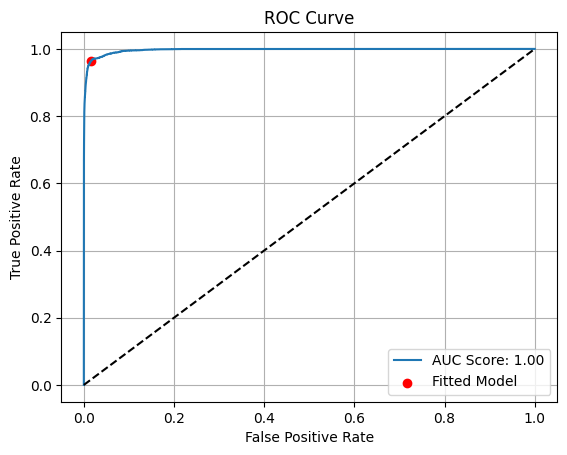

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
model_fpr = (y_train != y_pred).sum()/(y_train==0).sum()
model_tpr = recall_score(y_train, y_pred)

# Calculate the AUC score
auc_score = roc_auc_score(y_train, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC Score: {auc_score:.2f}')
# Add a marker to indicate the fitted model
plt.scatter(model_fpr, model_tpr, color='red', marker='o', label='Fitted Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


### Feature importance

Feature importance analysis provides insights into the predictive power of different features in a machine learning model. It helps
identify which features contribute the most to the model's predictions.

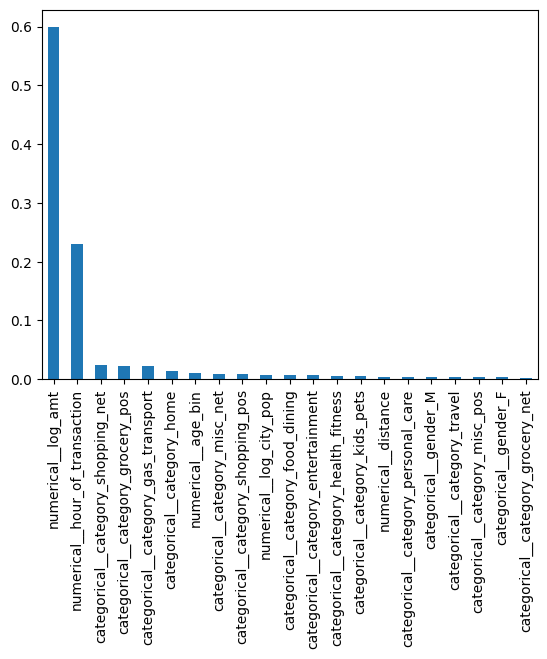

In [32]:
importances = best_rfc.feature_importances_
features = pipeline.get_feature_names_out()

feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

feature_importances.plot(kind='bar')
plt.show()

As anticipated from the correlations observed, the logarithm of the transaction amount exhibits the greatest influence on the model predictions.

### Performance on test data

Next, we'll assess the performance of our model on the test data.

In [33]:
y_pred = best_rfc.predict(X_test_transformed)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")

performance_metrics['RandomForest'] = {'accuracy':accuracy, 'precision': precision, 'recall':recall, 'f1':f1}

Test Accuracy: 0.98
Test Precision: 0.19
Test Recall: 0.94
Test F1 Score: 0.31


It appears that our model exhibits strong recall performance, yet the precision is lower than anticipated when evaluated on the test data.

### Confusion matrix

A confusion matrix is a tabular representation that summarizes the performance of a classification model by comparing the predicted labels to the actual labels of the test data. It consists of four main components:

- **True Positive (TP)**: Instances that are correctly predicted as positive by the model.
- **True Negative (TN)**: Instances that are correctly predicted as negative by the model.
- **False Positive (FP)**: Instances that are incorrectly predicted as positive by the model (Type I error).
- **False Negative (FN)**: Instances that are incorrectly predicted as negative by the model (Type II error).

The confusion matrix provides insights into the model's performance across different classes and helps evaluate its accuracy, precision, recall, and F1 score.

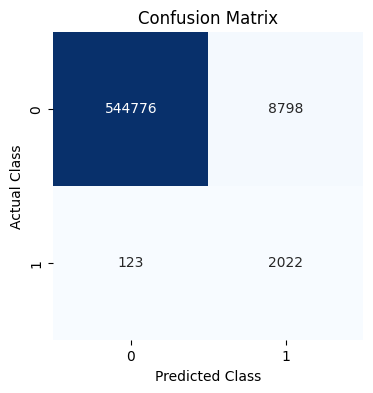

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

# Show the plot
plt.show()


Overall, our model exhibits high recall (low false negative rate) but low precision (high false positive rate). To enhance its performance, we'll explore ensemble methods.

## Ensemble methods

- Ensemble methods are machine learning techniques that combine the predictions of multiple base models to improve overall performance.
- Ensemble methods leverage the wisdom of crowds by combining the predictions of multiple models to make more accurate predictions than any single model alone.
- They can be classified into two main categories: bagging and boosting.
- Bagging methods (e.g., Random Forest) train multiple base models independently on different subsets of the training data and combine their predictions through averaging or voting.
- Boosting methods (e.g., AdaBoost, Gradient Boosting) train base models sequentially, with each subsequent model focusing on improving the performance of the previous model by emphasizing misclassified instances.

### Naive Bayes
First we'll train a basic Gaussian Naive Bayes model. Then, we'll incorporate it into our ensemble models.

In [35]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred_nb = nb.predict(X_test_transformed)

# Calculate the performance metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print the performance metrics
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive Bayes Precision: {precision_nb:.2f}")
print(f"Naive Bayes Recall: {recall_nb:.2f}")
print(f"Naive Bayes F1 Score: {f1_nb:.2f}")

performance_metrics['NaiveBayes'] = {'accuracy':accuracy_nb, 'precision': precision_nb, 'recall':recall_nb, 'f1':f1_nb}


Naive Bayes Accuracy: 0.80
Naive Bayes Precision: 0.01
Naive Bayes Recall: 0.69
Naive Bayes F1 Score: 0.03


Like Logistic Regression, this model does not achieve a satisfactory precision score. But it might still help the ensemble.

### Voting Classifier:
- The Voting Classifier combines the predictions of multiple individual classifiers (e.g., logistic regression, decision trees, support vector machines) and aggregates them through a voting mechanism.
- There are two main types of Voting Classifiers: hard voting and soft voting.
- In hard voting, the final prediction is determined by a majority vote among the base models.
- In soft voting, the final prediction is based on the average probability predicted by the base models.
- Voting Classifier works well when the base models are diverse and complementary, leading to improved performance compared to individual models.


In [36]:
# Define the estimators (individual models) to be used in the ensemble model
from sklearn.tree import DecisionTreeClassifier

estimators = [('dt', DecisionTreeClassifier(max_depth=3)), ('lr', LogisticRegression()), ('nb', GaussianNB())]

In [37]:
from sklearn.ensemble import VotingClassifier

# Define the voting classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Fit the voting classifier to the data
voting_clf.fit(X_subset, y_subset)

# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test_transformed)

# Calculate the performance metrics
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

# Print the performance metrics
print(f"Voting Accuracy: {accuracy_voting:.2f}")
print(f"Voting Precision: {precision_voting:.2f}")
print(f"Voting Recall: {recall_voting:.2f}")
print(f"Voting F1 Score: {f1_voting:.2f}")

performance_metrics['Voting'] = {'accuracy':accuracy_voting, 'precision': precision_voting, 'recall':recall_voting, 'f1':f1_voting}

Voting Accuracy: 1.00
Voting Precision: 0.71
Voting Recall: 0.56
Voting F1 Score: 0.63


The Voting Classifier exhibited enhancements in precision and F1 score, at the expense of decreased recall.

### Stacking Classifier
Stacking, or stacked generalization, is an ensemble learning technique that combines multiple base models using a meta-learner to make final predictions. Here's a brief explanation:

- **Base Models**: Stacking starts by training multiple diverse base models (e.g., decision trees, random forests, support vector machines) on the training data.
   
- **Meta-Learner**: Predictions from the base models are then used as features to train a meta-learner (usually a simple model).
   
- **Final Prediction**: The meta-learner combines the predictions of the base models to make the final prediction.

Stacking is effective because it leverages the strengths of multiple models and can potentially outperform any single base model. It is particularly useful when the base models have different strengths and weaknesses, as it allows them to compensate for each other's limitations.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

meta_model = RandomForestClassifier(random_state=8, max_depth=2, n_estimators=5, class_weight='balanced')

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model)

# Fit the stacking classifier to the data
stacking_clf.fit(X_subset, y_subset)

# Make predictions using the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test_transformed)

# Calculate the performance metrics
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)

# Print the performance metrics
print(f"Stacking Accuracy: {accuracy_stacking:.2f}")
print(f"Stacking Precision: {precision_stacking:.2f}")
print(f"Stacking Recall: {recall_stacking:.2f}")
print(f"Stacking F1 Score: {f1_stacking:.2f}")

performance_metrics['Stacking'] = {'accuracy':accuracy_stacking, 'precision': precision_stacking, 'recall':recall_stacking, 'f1':f1_stacking}


Stacking Accuracy: 0.88
Stacking Precision: 0.03
Stacking Recall: 0.86
Stacking F1 Score: 0.05


The Stacking Classifier produced considerably low precision and F1 score, possibly because of the underperformance of the Logistic Regression and Naive Bayes models.

### AdaBoost (Adaptive Boosting)
- AdaBoost combines multiple weak learners (typically decision trees) sequentially, with each subsequent model focusing on improving the performance of the previous one.
- It assigns higher weights to incorrectly classified instances, allowing subsequent models to focus more on difficult-to-classify instances.
- The final prediction is made by a weighted combination of the predictions from all the weak learners.


In [39]:
from sklearn.ensemble import AdaBoostClassifier

# Create the boosting classifier
boosting_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=10)

# Fit the boosting classifier to the data
boosting_clf.fit(X_train_transformed, y_train)

# Make predictions using the boosting classifier
y_pred_boosting = boosting_clf.predict(X_test_transformed)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred_boosting)
precision = precision_score(y_test, y_pred_boosting)
recall = recall_score(y_test, y_pred_boosting)
f1 = f1_score(y_test, y_pred_boosting)

# Print the performance metrics
print(f"Boosting Accuracy: {accuracy:.2f}")
print(f"Boosting Precision: {precision:.2f}")
print(f"Boosting Recall: {recall:.2f}")
print(f"Boosting F1 Score: {f1:.2f}")

performance_metrics['AdaBoostClassifier'] = {'accuracy':accuracy, 'precision': precision, 'recall':recall, 'f1':f1}


Boosting Accuracy: 1.00
Boosting Precision: 0.89
Boosting Recall: 0.77
Boosting F1 Score: 0.82


### XGBoost (Extreme Gradient Boosting)
- XGBoost is an efficient and scalable implementation of gradient boosting machines.
- It builds a series of decision trees sequentially, each tree correcting the errors made by the previous ones.
- XGBoost incorporates regularization techniques to prevent overfitting and achieve better generalization performance.
- It supports parallel and distributed computing, making it suitable for large datasets.


In [40]:
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=10, max_depth=5)

# Fit the XGBoost classifier to the data
xgb_clf.fit(X_train_transformed, y_train)

# Make predictions using the XGBoost classifier
y_pred_xgb = xgb_clf.predict(X_test_transformed)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print the performance metrics
print(f"XGBoost Accuracy: {accuracy:.2f}")
print(f"XGBoost Precision: {precision:.2f}")
print(f"XGBoost Recall: {recall:.2f}")
print(f"XGBoost F1 Score: {f1:.2f}")

performance_metrics['XGBClassifier'] = {'accuracy':accuracy, 'precision': precision, 'recall':recall, 'f1':f1}


XGBoost Accuracy: 1.00
XGBoost Precision: 0.87
XGBoost Recall: 0.72
XGBoost F1 Score: 0.79


Both AdaBoost and XGBoost achieve relatively high recall, precision, and F1 score, indicating their effectiveness. It appears that we have found our top-performing models.

### Isolation Forest
Before we conclude, considering our target variable is an imbalanced binary variable, we can experiment with using an anomaly detection algorithm to detect fraud transactions. Let's explore the Isolation Forest algorithm.

Isolation Forest is an anomaly detection algorithm that identifies outliers in a dataset. It works by isolating instances in a dataset by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

- Isolation Forest is particularly effective for identifying anomalies in high-dimensional datasets.
- It works well with imbalanced datasets and can efficiently handle large datasets.
- The algorithm is based on the principle that anomalies are less frequent and are typically located in sparser regions of the feature space.


In [41]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=.07, random_state=8)

# Fit the model to the data
iso_forest.fit(X_train_transformed)

# Predict using the model
y_pred_iso = iso_forest.predict(X_train_transformed)

# convert isolation forest prediction to be consistent with y_train
y_pred_iso = np.vectorize({1:0, -1:1}.get)(y_pred_iso)

# Calculate the performance metrics
accuracy = accuracy_score(y_train, y_pred_iso)
precision = precision_score(y_train, y_pred_iso)
recall = recall_score(y_train, y_pred_iso)
f1 = f1_score(y_train, y_pred_iso)

# Print the performance metrics
print(f"ISOF Accuracy: {accuracy:.2f}")
print(f"ISOF Precision: {precision:.2f}")
print(f"ISOF Recall: {recall:.2f}")
print(f"ISOF F1 Score: {f1:.2f}")

performance_metrics['IsolationForest'] = {'accuracy':accuracy, 'precision': precision, 'recall':recall, 'f1':f1}

ISOF Accuracy: 0.93
ISOF Precision: 0.03
ISOF Recall: 0.35
ISOF F1 Score: 0.05


In our scenario, Isolation Forest did not prove to be effective.

## Results Summary

The table below summarizes the performance metrics of various classifiers evaluated on the dataset.

These winner models, AdaBoost Classifier and XGB Classifier, stand out for their high accuracy and balanced performance across precision, recall, and F1 score metrics. They demonstrate robustness and effectiveness in accurately predicting fraudulent transactions while minimizing false positives and false negatives.

In [42]:
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
performance_df.style.format('{:.2f}').background_gradient(cmap='Greens')

,accuracy,precision,recall,f1
Dummy,0.99,0.00,0.00,0.00
LogisticRegression,0.75,0.01,0.73,0.02
RandomForest,0.98,0.19,0.94,0.31
NaiveBayes,0.80,0.01,0.69,0.03
Voting,1.00,0.71,0.56,0.63
Stacking,0.88,0.03,0.86,0.05
AdaBoostClassifier,1.00,0.89,0.77,0.82
XGBClassifier,1.00,0.87,0.72,0.79
IsolationForest,0.93,0.03,0.35,0.05
